***** TESTING WITH BACKEND: nbAgg *****


<IPython.core.display.Javascript object>


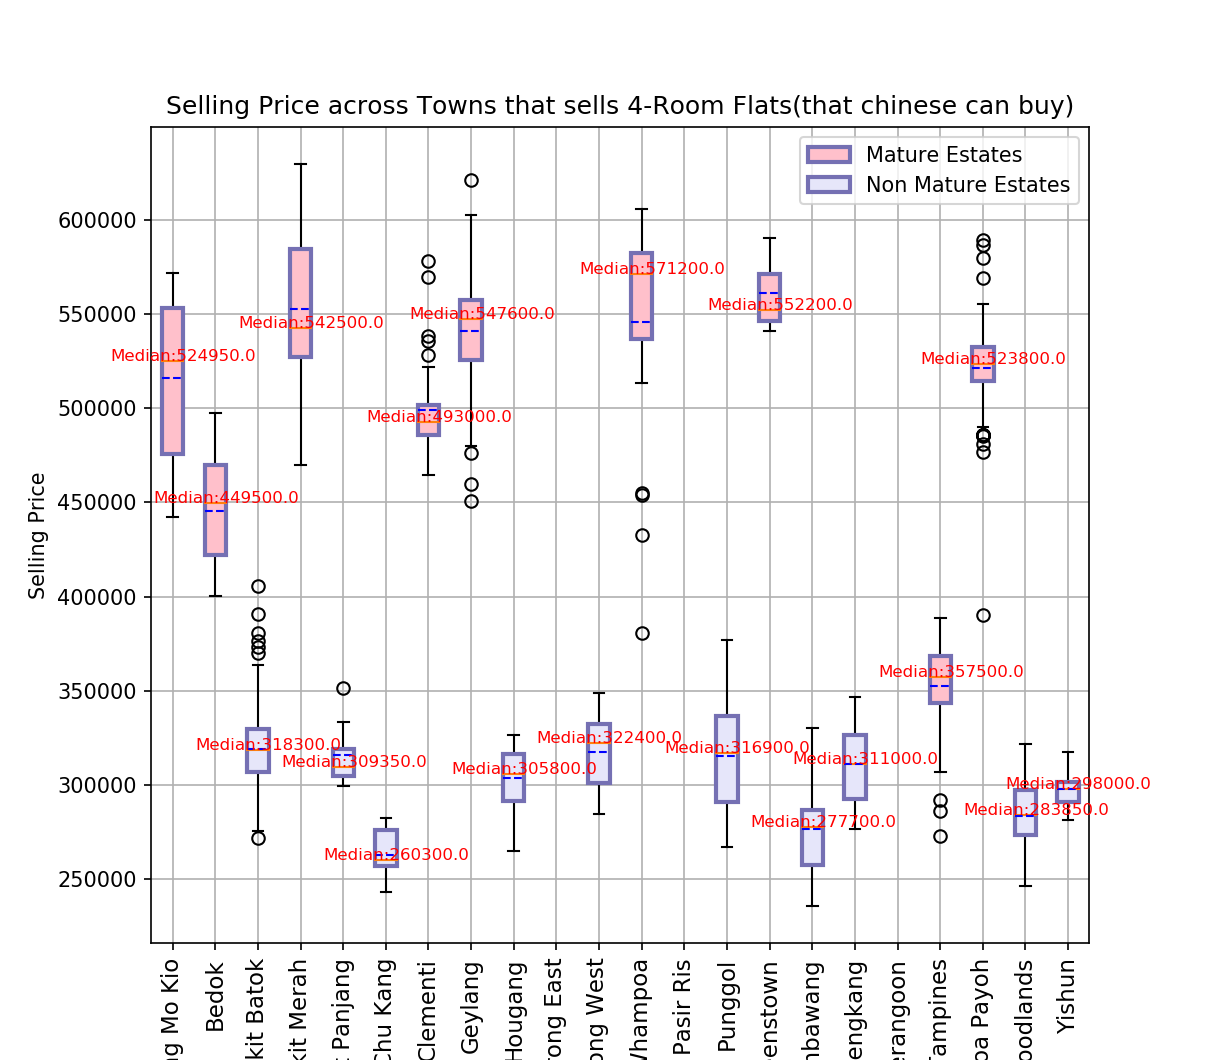

In [2]:
%matplotlib notebook
import matplotlib
#matplotlib.use("WxAgg")
#matplotlib.use("TkAgg")  #for pop up window
#matplotlib.use("GTKAgg")
#matplotlib.use("Qt5Agg")
#matplotlib.use("MacOSX")

print("***** TESTING WITH BACKEND: %s"%matplotlib.get_backend() + " *****")
import matplotlib.pyplot as plt
import numpy as np
import os
os.getcwd()
import mplcursors
# TO get a boxplot to see the number of 4-Rooms and number of 5-Room flats available for Nov 2018 Sale of balance flats

unitDetails = np.genfromtxt("Merged_unitsDetails_DistToMrt.csv", delimiter=",",
                skip_header=1,
                dtype=[('town','U24'),('rmType','U7'),('blk','U6'),
                      ('unitNum','U10'),('level','i4'),('sqm','i8'),
                      ('sellingPrice','i8'),('color','U12') ,
                      ('repurchasedFlat','U30'),('leaseLessThan60Yrs','U10'),
                      ('street','U30'),('probableCompletionDate','U10'),
                      ('deliveryPossessionDate','U30'),
                      ('leaseCommencementDate','U15'),
                      ('availableEthnicQuotaMl','U20'),
                      ('availableEthnicQuotaCh','U25'),
                      ('availableEthnicQuotaIn','U20'),('lastUpdate','U60'),
                      ('NearestMrt','U30'),('DistToMrt','f8'),
                      ('blkX','i8'),('blkY','i8')],
                missing_values=['na','-',''],filling_values=0, comments='!')



# Get selling prices across towns for 4-Room flats    
#print(amkPrice)
#print(bdPrice)
#data = [amkPrice,bdPrice,bbPrice,bmPrice,bpPrice,cckPrice,clPrice,glPrice,hgPrice,jePrice,jwPrice
#       ,kwnPrice,prcPrice,pgPrice,qtPrice,sbPrice,skPrice,sgnPrice,tapPrice,tpPrice,wlPrice,ysPrice]
labels = np.array(['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun'])
#print(data)
#print(len(data))
#print(len(labels))


########## short cut for the above rb 
allTowns = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']

output = []
for town in allTowns:
    townPrice = []
    #print('top', town)
    for unit in unitDetails:
        if unit['rmType']=='4-Room':
            if unit['repurchasedFlat']=='':
                if unit['leaseLessThan60Yrs']=='':
                    if unit['town']==town:
                        townPrice1 = unit['sellingPrice'] 
                        townPrice.append(townPrice1)
    output.append(townPrice)
#print(allTowns[11])
#print('rb output', output[11])
#print(len(output))   
#print(output)

########################################################

## Mature and Non Mature estates
estatesMaturity  = np.genfromtxt("Number of Applications Received for 3-room and bigger flats as at 19 Nov 2018.csv", delimiter=",",skip_header=1,
                dtype=[('town','U24'),('FlatType','U50'),('No_of_Units','i8'),('Number_of_applicants','i8'),
                      ('Rate_Non_Elderly_First_timers','f8'),('Rate_Non_Elderly_Second_timers','f8'),
                      ('Rate_Non_Elderly_Overall','f8'),('Mature_Estates','U8')],
                missing_values=['na','-','','NA'],filling_values=0)

estatesMaturityTown= estatesMaturity['town']
estatesMaturityMature= estatesMaturity['Mature_Estates']



estatesMaturityCon= zip(estatesMaturityTown,estatesMaturityMature)

# make unique sets of 'towns' and 'Mature Estates'
estatesMaturityCon =set(estatesMaturityCon)
#print(estatesMaturityCon)
#print(len(estatesMaturityCon))


#print(estatesMaturity['town'])
#print(estatesMaturity['Mature_Estates'])

# Mature and Non Mature estates


nMature = []
yMature = []


for town in estatesMaturityCon:
    if town[1]=='N':
        nMature.append(town[0])
    elif town[1]=='Y':
        yMature.append(town[0])
nMature.append('Jurong East')
nMature.append('Jurong West')
nMature.remove('Jurong East / West')
#print("Mature estates : \n{}".format(yMature))
#print("Non Mature estates : \n{}".format(nMature))





#subset as debugger
#dataSubset = [amkPrice, bbPrice,hgPrice,jePrice,jwPrice,kwnPrice,prcPrice,skPrice]
#print('kwn', kwnPrice)
#print('jw', jwPrice)
#print(dataSubset)


    

Mature = []
for repeatMature in range(len(yMature)):
    Mature.append('Mature')


NonMature = []
for repeatMature in range(len(yMature)):
    NonMature.append('Non Mature')





## Making labels in order
label = yMature + nMature
#print(label)

# Make different colour for Mature and Non Mature estates  
values= Mature + NonMature
keys = label




# Create a figure instance
fig, ax = plt.subplots(figsize=(8,7))
plt.title('Selling Price across Towns that sells 4-Room Flats(that chinese can buy)')
plt.xlabel('Towns')
plt.ylabel('Selling Price')

# Create an axes instance
#ax = fig.add_subplot(111)
#ax = plt.gca()

# Create the boxplot
#bp = ax.boxplot(dataSubset)
    
# Adding colors to my boxplot
bp = ax.boxplot(output, patch_artist=True,labels= labels,meanprops = dict(color='blue'),showmeans=True, meanline=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    #change outline color
    box.set( color='#7570b3', linewidth=2)
    
    # change fill color
    region_color_dict = {
    "Mature": "pink",
    "Non Mature": "lavender",      
}

town_region_dict= dict(zip(keys,values))  #### dict used this way diff
#print('town_region_dict', town_region_dict)
#print('region_color_dict', region_color_dict)
for label, box in zip(labels, bp["boxes"]):
    box.set_facecolor(region_color_dict[town_region_dict[label]])  #set face color to change color of boxes.

    
#bp=ax.boxplot(output)
plt.xticks(fontsize=11,rotation='vertical')

# Write the median value above the median line
for line in bp['medians']:
    #print(line)
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    #print(x,y)
    if np.isnan(y)==True:
        #print("hello")
        continue
        #skip the loop
    # overlay median value
    ax.text(x, y, 'Median:{:.1f}'.format(y),
         horizontalalignment='center',fontsize=8,color='red') # draw above, centered

    
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.legend([bp["boxes"][0], bp["boxes"][2]], ['Mature Estates', 'Non Mature Estates'], loc='upper right')





# https://matplotlib.org/api/artist_api.html
# https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html
# https://stackoverflow.com/questions/45017568/how-to-check-if-click-is-on-scatter-plot-point-with-multiple-markers-matplotlib
# https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->")) #xytext=(20,20) means 20,20 to the top and right of current point


annot.set_visible(False)

def getAnnoText(town, sellingPrice, rmType='4-Room'):
    """ get the annotation text to be shown during popup """
    subsetTown = unitDetails[unitDetails['town'] == town]
    subsetTownRmType = subsetTown[subsetTown['rmType'] == rmType]
    subsetTownRmTypePrice = subsetTownRmType[subsetTownRmType[
                                'sellingPrice'] == sellingPrice]
    subsetLen = len(subsetTownRmTypePrice)
    if subsetLen >1:
        print("There's "+str(subsetLen)+" units with same town and price." +
               "Selecting only 1st unit to be displayed" )
    #print(subsetTownRmTypePrice)
    # get the 1st matching unit,
    # TODO: what if there's more than 1 unit?
    # for now, print out msg 
    unit = subsetTownRmTypePrice[0]
    
    # toprint blk, unit, sellingPrice
    #  sqm, repurchasedFlat, leaseLessThan60Yrs, 
    # deliveryPossessionDate, leaseCommencementDate, NearestMrt, DistToMrt

    repurchasedFlat = unit['repurchasedFlat'] \
            if unit['repurchasedFlat']  != '' else 'NA'
    leaseLessThan60Yrs = unit['leaseLessThan60Yrs'] \
            if unit['leaseLessThan60Yrs'] !='' else 'NA'

    outputStr1 = "%s (%s) $%.1fk (%s sqm)\n" % (unit['blk'], unit['unitNum'], 
                    unit['sellingPrice']/1000.0, unit['sqm'])
    outputStr2 = "Repurchased Flat: %s\nLease <60yrs: %s\n" % (
                    repurchasedFlat, leaseLessThan60Yrs )
    outputStr3 = "DeliveryPossessionDate: %s\nLeaseCommencementDate:%s\n\n" % (
                    unit['deliveryPossessionDate'],unit['leaseCommencementDate'])
    outputStrMrt = "Nearest Mrt: %s (%.0fm)\n" % (
                    unit['NearestMrt'], unit['DistToMrt'])
    outputStr = outputStr1 + outputStrMrt + outputStr2 + outputStr3
    #print('outputStr', outputStr)
    return(outputStr)

def update_annot(flier, ind):
    #print('update_annot, flier:', flier.get_xydata(), ' ind:', ind['ind'])

    oneOutlierPoint = flier.get_xydata()[ind["ind"][0]]
    annot.xy = oneOutlierPoint
    annoTextAll = ''
    for outlierIdx in ind['ind']:
        outlierPoint = flier.get_xydata()[outlierIdx]
        x = int(outlierPoint[0]) -1 #boxPlot start x=1, list idx starts from 0
        #print('x:', x)
        townName = allTowns[x]
        #print('townName:', townName)

        y = int(outlierPoint[1])
        #print('y:', y)
        annoText = getAnnoText(townName, y, '4-Room') # Change here for 5-Room
        annoTextAll = annoTextAll + annoText

    annot.set_text(annoTextAll)
    annot.get_bbox_patch().set_facecolor("lightyellow")
    annot.get_bbox_patch().set_animated(True)
    # annot.get_bbox_patch().set_alpha(0.4)

def hover_callback(event):
    #print('hover_callback, event: ', event)
    vis = annot.get_visible()
    if event.inaxes == ax:
        for flier in bp["fliers"]:
            cont, ind = flier.contains(event)
            if cont:
                update_annot(flier, ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()




#fig.canvas.mpl_connect("motion_notify_event", hover_callback) # on hover
fig.canvas.mpl_connect("button_press_event", hover_callback) # on click








plt.show()

